## Car brand Classification

In [48]:
# import the libraries

from tensorflow.keras.layers import Input,Lambda,Flatten,Dense
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [49]:
# resize all the images to this

IMAGE_SIZE = [224,224]

train_path = 'Datasets/train'
test_path = 'Datasets/test'

In [50]:
# import the ResNet50 library

resnet = ResNet50(input_shape = IMAGE_SIZE + [3],weights = 'imagenet',include_top = False)

In [51]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [52]:
# dont train existing weights

for layer in resnet.layers:
    layer.trianable = False

In [80]:
# useful for getting no of output classes

folders = glob('Datasets/train/*')
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [79]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [55]:
prediction = Dense(len(folders),activation = 'softmax')(x)

#Create a model object
model = Model(inputs = resnet.input,outputs = prediction)

In [56]:
# view the structure of the model

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [57]:
# Let model to know what cost and optimizer to use

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [58]:
# use the image data generator to import images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [81]:
# target size should be same as IMAGE_SIZE

training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [60]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [82]:
len(test_set)

2

In [61]:
# fit the model
# Running the cell

r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)                    
)

Epoch 1/50
2/2 [==============================] - 42s 21s/step - loss: 7.9141 - accuracy: 0.2812 - val_loss: 18.9251 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 33s 16s/step - loss: 3.9647 - accuracy: 0.7344 - val_loss: 1967.7001 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 33s 16s/step - loss: 0.3003 - accuracy: 0.9219 - val_loss: 26844.2676 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 34s 17s/step - loss: 0.2773 - accuracy: 0.9219 - val_loss: 282942.2500 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 33s 17s/step - loss: 0.1867 - accuracy: 0.9375 - val_loss: 731808.1875 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 33s 17s/step - loss: 0.3763 - accuracy: 0.9219 - val_loss: 982805.6250 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 38s 19s/step - loss: 1.6881 - accuracy: 0.9375 - val_loss: 197932.6250 - val_accuracy: 0.3276

In [62]:
r.history

{'loss': [7.914065837860107,
  3.9646520614624023,
  0.30027684569358826,
  0.27727675437927246,
  0.18674348294734955,
  0.37634724378585815,
  1.688094973564148,
  0.27463358640670776,
  1.1769548654556274,
  0.07436379790306091,
  0.47810599207878113,
  0.1380537450313568,
  0.07995077967643738,
  0.08941300213336945,
  0.02678968757390976,
  0.03709927201271057,
  0.06356778740882874,
  1.7362961769104004,
  2.7231204509735107,
  0.38755011558532715,
  2.043355941772461,
  1.2027068138122559,
  20.643020629882812,
  1.1698224544525146,
  13.506964683532715,
  6.380913257598877,
  1.1847076416015625,
  4.752082824707031,
  2.248307704925537,
  0.5107213258743286,
  0.4320729970932007,
  0.4649999737739563,
  0.4284211993217468,
  0.33401283621788025,
  0.9403758645057678,
  0.33598893880844116,
  0.3454294502735138,
  0.2832682132720947,
  0.3057337999343872,
  0.2940842807292938,
  0.30607861280441284,
  0.3435363173484802,
  0.18891286849975586,
  0.24044904112815857,
  0.25245028

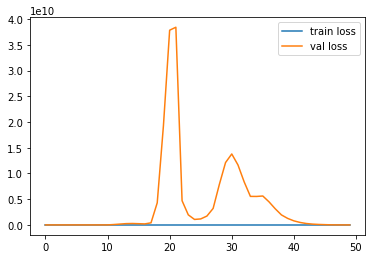

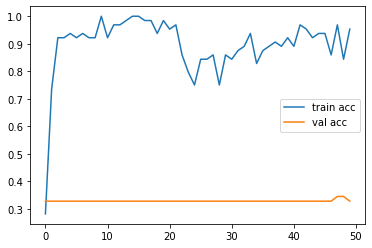

<Figure size 432x288 with 0 Axes>

In [63]:
# plot the loss

plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [64]:
# save it as h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [65]:
y_pred = model.predict(test_set)
y_pred

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [66]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [67]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [68]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

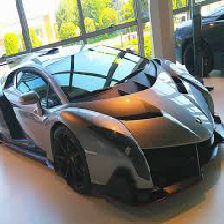

In [69]:
img

In [70]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [71]:
x.shape

(224, 224, 3)

In [72]:
x=x/255

In [73]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [74]:
model.predict(img_data)

array([[0., 0., 1.]], dtype=float32)

In [75]:
a=np.argmax(model.predict(img_data), axis=1)

In [76]:
a==1

array([False])

In [77]:
a

array([2], dtype=int64)